In [1]:
# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# For plotting results
import matplotlib.pyplot as plt

# For reproducibility (optional)
import numpy as np
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

print("Libraries imported successfully!")


2025-11-29 12:31:40.188279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764419500.341385      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764419500.391475      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Libraries imported successfully!


In [2]:
# Load CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Data loaded and preprocessed successfully!")
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Data loaded and preprocessed successfully!
Training data shape: (50000, 32, 32, 3) (50000, 10)
Test data shape: (10000, 32, 32, 3) (10000, 10)


In [3]:
# Build AlexNet-like CNN model for CIFAR-10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

model = Sequential()

# Layer 1
model.add(Conv2D(96, (3,3), strides=(1,1), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, (3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 4
model.add(Conv2D(384, (3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 5
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764419522.125895      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764419522.126560      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,048,394 (30.70 MB)

 Trainable params: 8,047,690 (30.70 MB)

 Non-trainable params: 704 (2.75 KB)

In [4]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    optimizer='adam',                  # Adaptive optimizer
    metrics=['accuracy']               # Track accuracy during training
)

print("Model compiled successfully!")


Model compiled successfully!


In [5]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,          # Number of samples per gradient update
    epochs=20,               # Number of training epochs
    validation_split=0.2,    # 20% of training data used for validation
    verbose=1                # Display training progress
)

print("Model training completed!")


Epoch 1/20


I0000 00:00:1764419527.567102     110 service.cc:148] XLA service 0x787e84006130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764419527.567936     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764419527.567952     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764419528.044155     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/313 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.0734 - loss: 3.2431

I0000 00:00:1764419536.271888     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.3015 - loss: 1.9204 - val_accuracy: 0.1428 - val_loss: 3.9740
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5635 - loss: 1.2287 - val_accuracy: 0.5492 - val_loss: 1.2837
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6584 - loss: 0.9783 - val_accuracy: 0.6065 - val_loss: 1.1353
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7064 - loss: 0.8406 - val_accuracy: 0.5218 - val_loss: 1.5829
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7484 - loss: 0.7279 - val_accuracy: 0.5915 - val_loss: 1.3440
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7848 - loss: 0.6143 - val_accuracy: 0.6216 - val_loss: 1.1474
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8176 - loss: 0.5310 - val_accuracy: 0.6511 - val_loss: 1.1716
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8352 - loss: 0.4737 - val_accurac

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 1.3108
Test Accuracy: 0.7329


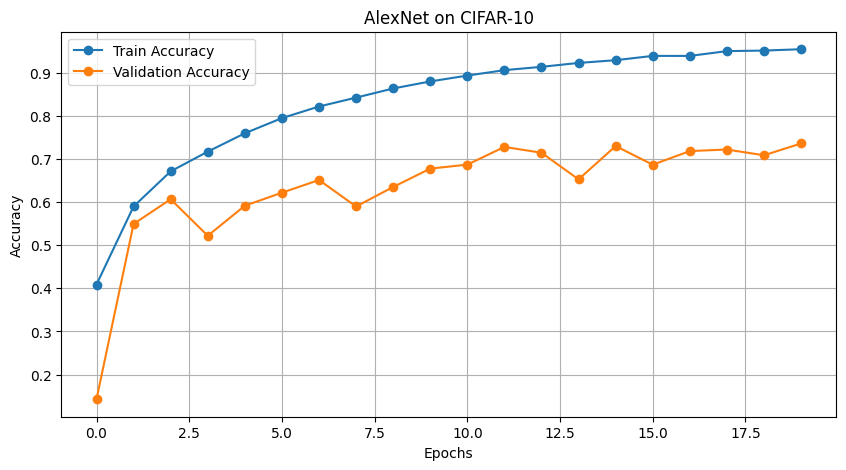

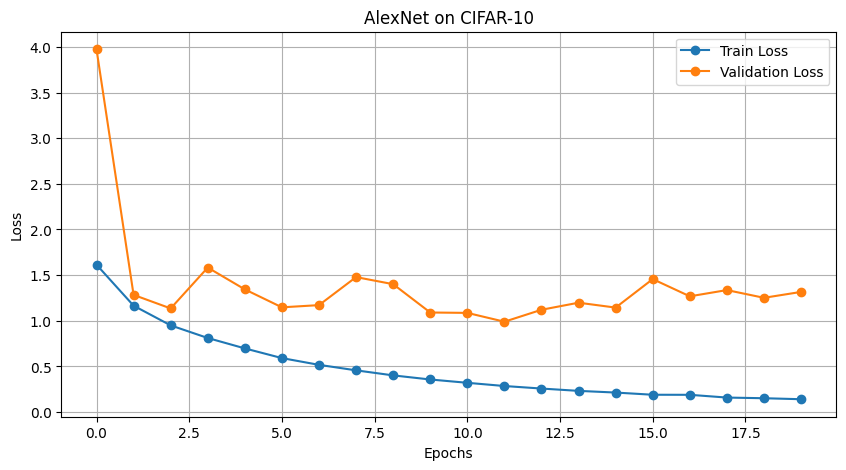

In [7]:
# Plot training & validation accuracy
plt.figure(figsize=(10,5))

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('AlexNet on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Plot training & validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('AlexNet on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


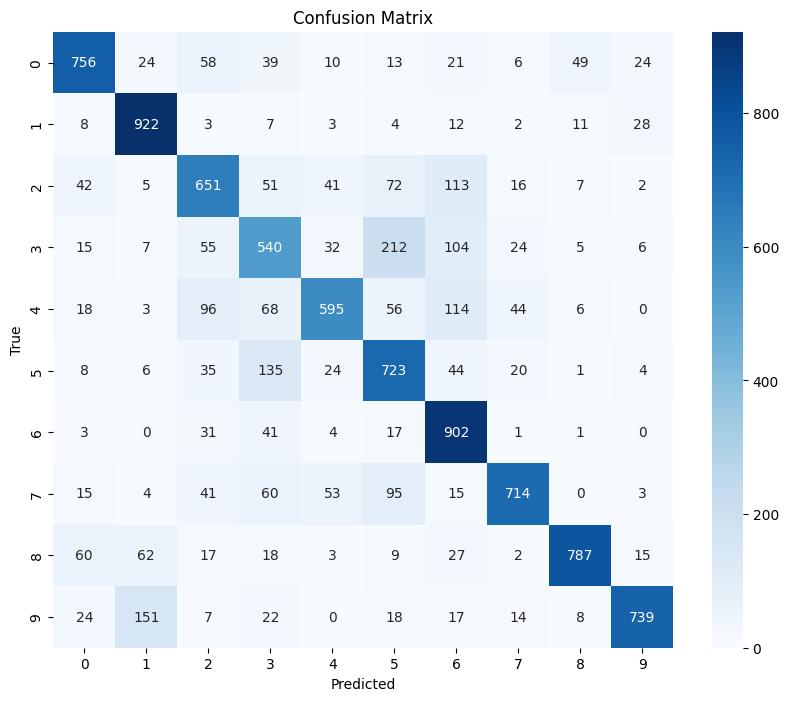


Classification Report:
              precision    recall  f1-score   support

           0     0.7966    0.7560    0.7758      1000
           1     0.7787    0.9220    0.8443      1000
           2     0.6549    0.6510    0.6530      1000
           3     0.5505    0.5400    0.5452      1000
           4     0.7778    0.5950    0.6742      1000
           5     0.5931    0.7230    0.6516      1000
           6     0.6589    0.9020    0.7615      1000
           7     0.8470    0.7140    0.7748      1000
           8     0.8994    0.7870    0.8395      1000
           9     0.9001    0.7390    0.8116      1000

    accuracy                         0.7329     10000
   macro avg     0.7457    0.7329    0.7332     10000
weighted avg     0.7457    0.7329    0.7332     10000


Specificity (TNR) per class:
Class 0: 0.9786
Class 1: 0.9709
Class 2: 0.9619
Class 3: 0.9510
Class 4: 0.9811
Class 5: 0.9449
Class 6: 0.9481
Class 7: 0.9857
Class 8: 0.9902
Class 9: 0.9909

AUC-ROC per class:
Class 0

In [8]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    matthews_corrcoef, cohen_kappa_score
)
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1. Generate predictions
# ------------------------------------------------------------
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# ------------------------------------------------------------
# 2. Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------------------------------------
# 3. Precision, Recall, F1-score
# ------------------------------------------------------------
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# ------------------------------------------------------------
# 4. Specificity (TNR) for each class
# ------------------------------------------------------------
specificity_scores = []
for i in range(10):
    TN = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
    FP = np.sum(cm[:, i]) - cm[i, i]
    specificity = TN / (TN + FP)
    specificity_scores.append(specificity)

print("\nSpecificity (TNR) per class:")
for i, spec in enumerate(specificity_scores):
    print(f"Class {i}: {spec:.4f}")

# ------------------------------------------------------------
# 5. AUC-ROC (One-vs-Rest for 10 classes)
# ------------------------------------------------------------
y_true_bin = label_binarize(y_true, classes=list(range(10)))
auc_scores = roc_auc_score(y_true_bin, y_pred_probs, average=None)

print("\nAUC-ROC per class:")
for i, auc in enumerate(auc_scores):
    print(f"Class {i}: {auc:.4f}")

print(f"\nMacro AUC: {np.mean(auc_scores):.4f}")

# ------------------------------------------------------------
# 6. Matthews Correlation Coefficient (MCC)
# ------------------------------------------------------------
mcc = matthews_corrcoef(y_true, y_pred)
print(f"\nMatthews Correlation Coefficient (MCC): {mcc:.4f}")

# ------------------------------------------------------------
# 7. Cohen’s Kappa Score
# ------------------------------------------------------------
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen’s Kappa: {kappa:.4f}")
